In [2]:
%pylab inline
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Terms

| Name | English | Symbol | Description | 
|:-----|:--------|:-------|:------------|
| 유의수준 | Significance Level | $ \alpha $ | 보통 0.05 (5%), 귀무가설이 기각될 확률 |


# Hypothesis Test

## 귀무가설과 대립가설 


* **Null Hypothesis $ H_0 $ (귀무가설)**
  - sampling에서는 sample observations은 단순히 우연히 일어난 것이라고 가정함
  - 두집단을 비교시 같거나 차이가 없다로 해석을 한다
  - 기본적으로는 참으로 추정되며, 거부하기 위해서는 증거가 필요하다
  
  
* **Alternative Hypothesis $ H_1 $ or $ H_a $ (대립가설)** 
  - sampling에서는 sample observations은 우연히 일어난 것이 아니라고 가정함
  - 두집단을 비교시 차이가 있다고 가정을 한다


## 단측 및 양측 검정 


* **Two-Tailed Test 양측 검정 -> <span style="color:red">다르냐?</span>**
  - 모집단의 모수가 귀무 가설에서의 값보다 **크거나 작은지를 판단**하려면 `양측 대립 가설` 을 사용
  - 특정 고등학교의 시험 결과가 국가 평균(72점)과 `다른지` 여부를 판단하려고 함 <br>귀무가설은 $ H_0: \mu = 72 $ 이고, 대립가설은 $ H_1: \mu \ne 72 $ <br> 국가 평균과 `다른지`를 판단하는 것이기 때문에 양측 검정이다. (더 높을수도 더 낮을 수도 있다) 
  
  
* **One-Tailed Test 단측 검정 -> <span style="color:red">보다 크냐 또는 보다 작냐?</span>**
  - 특정 방향으로 모집단 모수가 귀무가설에서의 값과 다른지 여부를 확인하려면 `단측 대립 가설`을 사용 
  - 특정 고등학교의 시험 결과가 국가 평균(72점)보다 더 높은지를 판단하려고 함 <br>귀무가설은 $ H_0: \mu = 72 $ 이고, 대립가설은 $ H_1: \mu > 72 $ <br>국가 평균보다 `높은지`를 판단하는 것이기 때문에 단측 검정을 한다 
  




## 제 1종 오류 VS 제 2종 오류

| Decision                    | $ H_0 $ is True (귀무가설 참)  | $ H_0 $ is not True (귀무가설 거짓) |
|:----------------------------|:-----------------------------|:---------------------------------|
| Accept $ H_0 $ (귀무가설 채택) | Correct (No Error) <br>$ p = 1 - \alpha $          | Type 2 Error ($ p = \beta $) <br>2종 오류 |
| Reject $ H_0 $ (귀무가설 기각) | Type 1 Error ($ p = \alpha $) <br> 1종 오류 | Correct (No Error) <br> $ p = 1 - \beta $ |



### 제 1종 오류 (False Positive)

**<span style="color:red">1종 오류는 귀무가설이 참인데 기각되었을때 발생합니다.</span>**<br>

$$ \alpha = P(\text{type 1 error}) = P(\text{reject } H_0 | H_0 \text{ is true} )$$ 

 - 양치기 소년에서 귀무가설은 "늑대가 없다" 입니다. <br>실제로 늑대가 없는 상황에서 늑대가 있다고 잘못된 알람 (False Alarm)을 준 경우 발생합니다.
 - 법정에서의 귀무가설은 피고인이 죄가 없다입니다. <br>이때 죄가 있다고 판결이 난경우 귀무가설은 기각되었고, 잘못된 판결이 내려 졌습니다.
 - **1종 오류가 발생할 확률을 "유의수준 (significance level)"  이라고 합니다.**


### 제 2종 오류 (False Negative)

**<span style="color:red">2종 오류는 귀무가설이 거짓인데, 기각시키지 못했을때 발생합니다.</span>** <br>

$$ \beta = P(\text{type 2 error}) = P(\text{accept } H_0 | H_0 \text{ is false}) $$

 - 양치기 소년에서 귀무가설은 "늑대가 없다" 입니다. 이때 실제로는 늑대가 있는 케이스 입니다. <br>그리고 양치기 소년은 늑대가 없다고 말하고 (귀무가설이 맞다!) 다른데 놀러간 케이스라고 할 수 있습니다.
 - 바이러스 백신을 만들었습니다. 귀무가설은 바이러스 백신은 효과가 없다 입니다.<br>이때 실제로는 백신이 효과가 있는데도 불구하고 잘못된 판단으로 효과가 없다고 했을때 (귀무가설을 인정) 많은 사람들을 살릴수 있었음에도 불구하고 인명피해를 내놓은 상황일수 있습니다. 
 

### 알파와 베타를 동시에 줄이는건 불가능

![](images/hypothesis-test-error.png)

위의 그림에서 보듯이, $ \alpha $ 와 $ \beta $ 를 모두 줄일수는 없습니다.<br>
검사의 신뢰도를 높이기 위해서 임계값을 높여서 (ex. 0.05 -> 0.03) $ \alpha $ 의 범위를 줄이게 되면, <br>
동시에 $ \beta $ 의 범위는 높아지게 됩니다.

**즉, $ \alpha $ 와 $ \beta $ 는 서로 상반된 크기를 갖습니다.**


### P-Value

유의 확률 (significance probability) 이라고도 하며 p-value (probability value) 라고도 합니다. <br>
**귀무가설이 맞다고 가정을 할때, 관측된 값보다 극단적인 결과가 실제로 관측될 확률입니다.**<br>

일반적으로는 0.05를 사용하지만 상황에따라서 0.1, 0.01을 사용하기도 합니다. <br>
(근데 왜 하필 0.05냐.. 그건 그냥 프랑스에서 모여서 결론지은 통계 아저씨들에게 물어보면 된는데.. 그냥 정해진 것임) 

위에서 이야기한 가설검정에 대한 지표로 사용되는데.. 상황에 따라서 다양한 검정 방법을 사용하게 됩니다.

# Normality Test

- 현실에서는 바빠서 대충 t-test돌리고 하지만, 사실 통계라는 것은 상당히 많은 제약사항들이 붙어 있습니다. <br> `이때 데이터는 정규분포를 따라야 한다` 와 같은 문장이 있다면 정규성 검증을 통해서 정규분포를 따르는지 먼저 체크를 해줘야 합니다.

- 예를 들어 **T-test, ANOVA 처럼 모수적 검정방법은 일반적으로 분포가 정규분포를 따른다고 가정**을 합니다. <br>표본의 크기가 30개 이상이 되면 중심극한 정리에 의해서 정규성을 갖고 있다고 가정을 할수 있지만, <br>**30개 미만인 경우에는 정규성 검정을 먼저 수행해야 합니다.**
- 사실 실무에서는 데이터가 대부분 빅데이터라, 이런거 잘 안합니다.

## Shapiro-Wilks Test

 - 샤피로 윌크 검정
 - 표본수가 2000개 미만인 데이터셋에 적합 
 - $ H_0 $ : 귀무가설은 정규분포를 따른다
 - P-value 가 0.05보다 높다면 정규분포를 따른다고 가정한다 

uniform data | 통계치: 0.93 | p-value:0.00005 | 정규분포를 따르는가?: False
normal data  | 통계치: 0.99 | p-value:0.32791 | 정규분포를 따르는가?: True


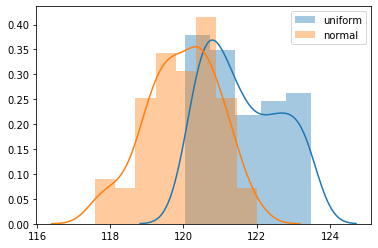

In [87]:
from scipy.stats import shapiro
 
uniform = np.random.random(size=100) * 3.5 + 120
normal = np.random.normal(loc=120, scale=1, size=100)

stat1, p1 = shapiro(uniform)
stat2, p2 = shapiro(normal)

print(f'uniform data | 통계치: {stat1:.2f} | p-value:{p1:.5f} | 정규분포를 따르는가?: {p1 > 0.05}')
print(f'normal data  | 통계치: {stat2:.2f} | p-value:{p2:.5f} | 정규분포를 따르는가?: {p2 > 0.05}')

sns.distplot(uniform, label='uniform')
sns.distplot(normal, label='normal')
legend()

## Agostino's K^2 Test

# Z-Test 

* 모집단의 표준 편차를 알고 있는 경우 사용 (모집단의 표준편차를 모르는 경우 -> T-test 사용)
* 데이터는 continuous value 일때 사용
* 표본 크기는 20보다 커야하며, bias가 심하게 있다면 사용할수 없다 